In [24]:
from ultralytics import YOLO
import torch
from IPython.display import display, Image
!yolo checks

Ultralytics YOLOv8.0.52 🚀 Python-3.10.9 torch-1.13.1 CPU
Setup complete ✅ (10 CPUs, 16.0 GB RAM, 226.8/926.4 GB disk)


In [10]:
# BUILD model
model = YOLO("yolov8n.yaml")


                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.Conv                  [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.Conv                  [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.C2f                   [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.Conv                  [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.C2f                   [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.Conv                  [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.C2f                   [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.Conv                  [128

In [11]:
# LOAD weights
model = YOLO("yolov8n.pt") 

In [13]:
# TRAIN
model.train(data="data.yaml",
            epochs=20,
            imgsz=640)

New https://pypi.org/project/ultralytics/8.0.52 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.51 🚀 Python-3.10.9 torch-1.13.1 CPU
yolo/engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=data.yaml, epochs=20, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, min_memory=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torc

In [14]:
model.val()

Ultralytics YOLOv8.0.51 🚀 Python-3.10.9 torch-1.13.1 CPU
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /Users/agustingenoud/Desktop/apps/Data-Science-Challenge-main/Dataset-Yolo/WildFire_Smoke_Dataset_YOLO/datasets/valid/labels.cache... 147 images, 0 backgrounds, 0 corrupt: 100%|██████████| 147/147 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:23<00:00,  2.33s/it]
                   all        147        147      0.871      0.857      0.906      0.491
Speed: 0.6ms preprocess, 154.7ms inference, 0.0ms loss, 0.4ms postprocess per image
Results saved to runs/detect/val2


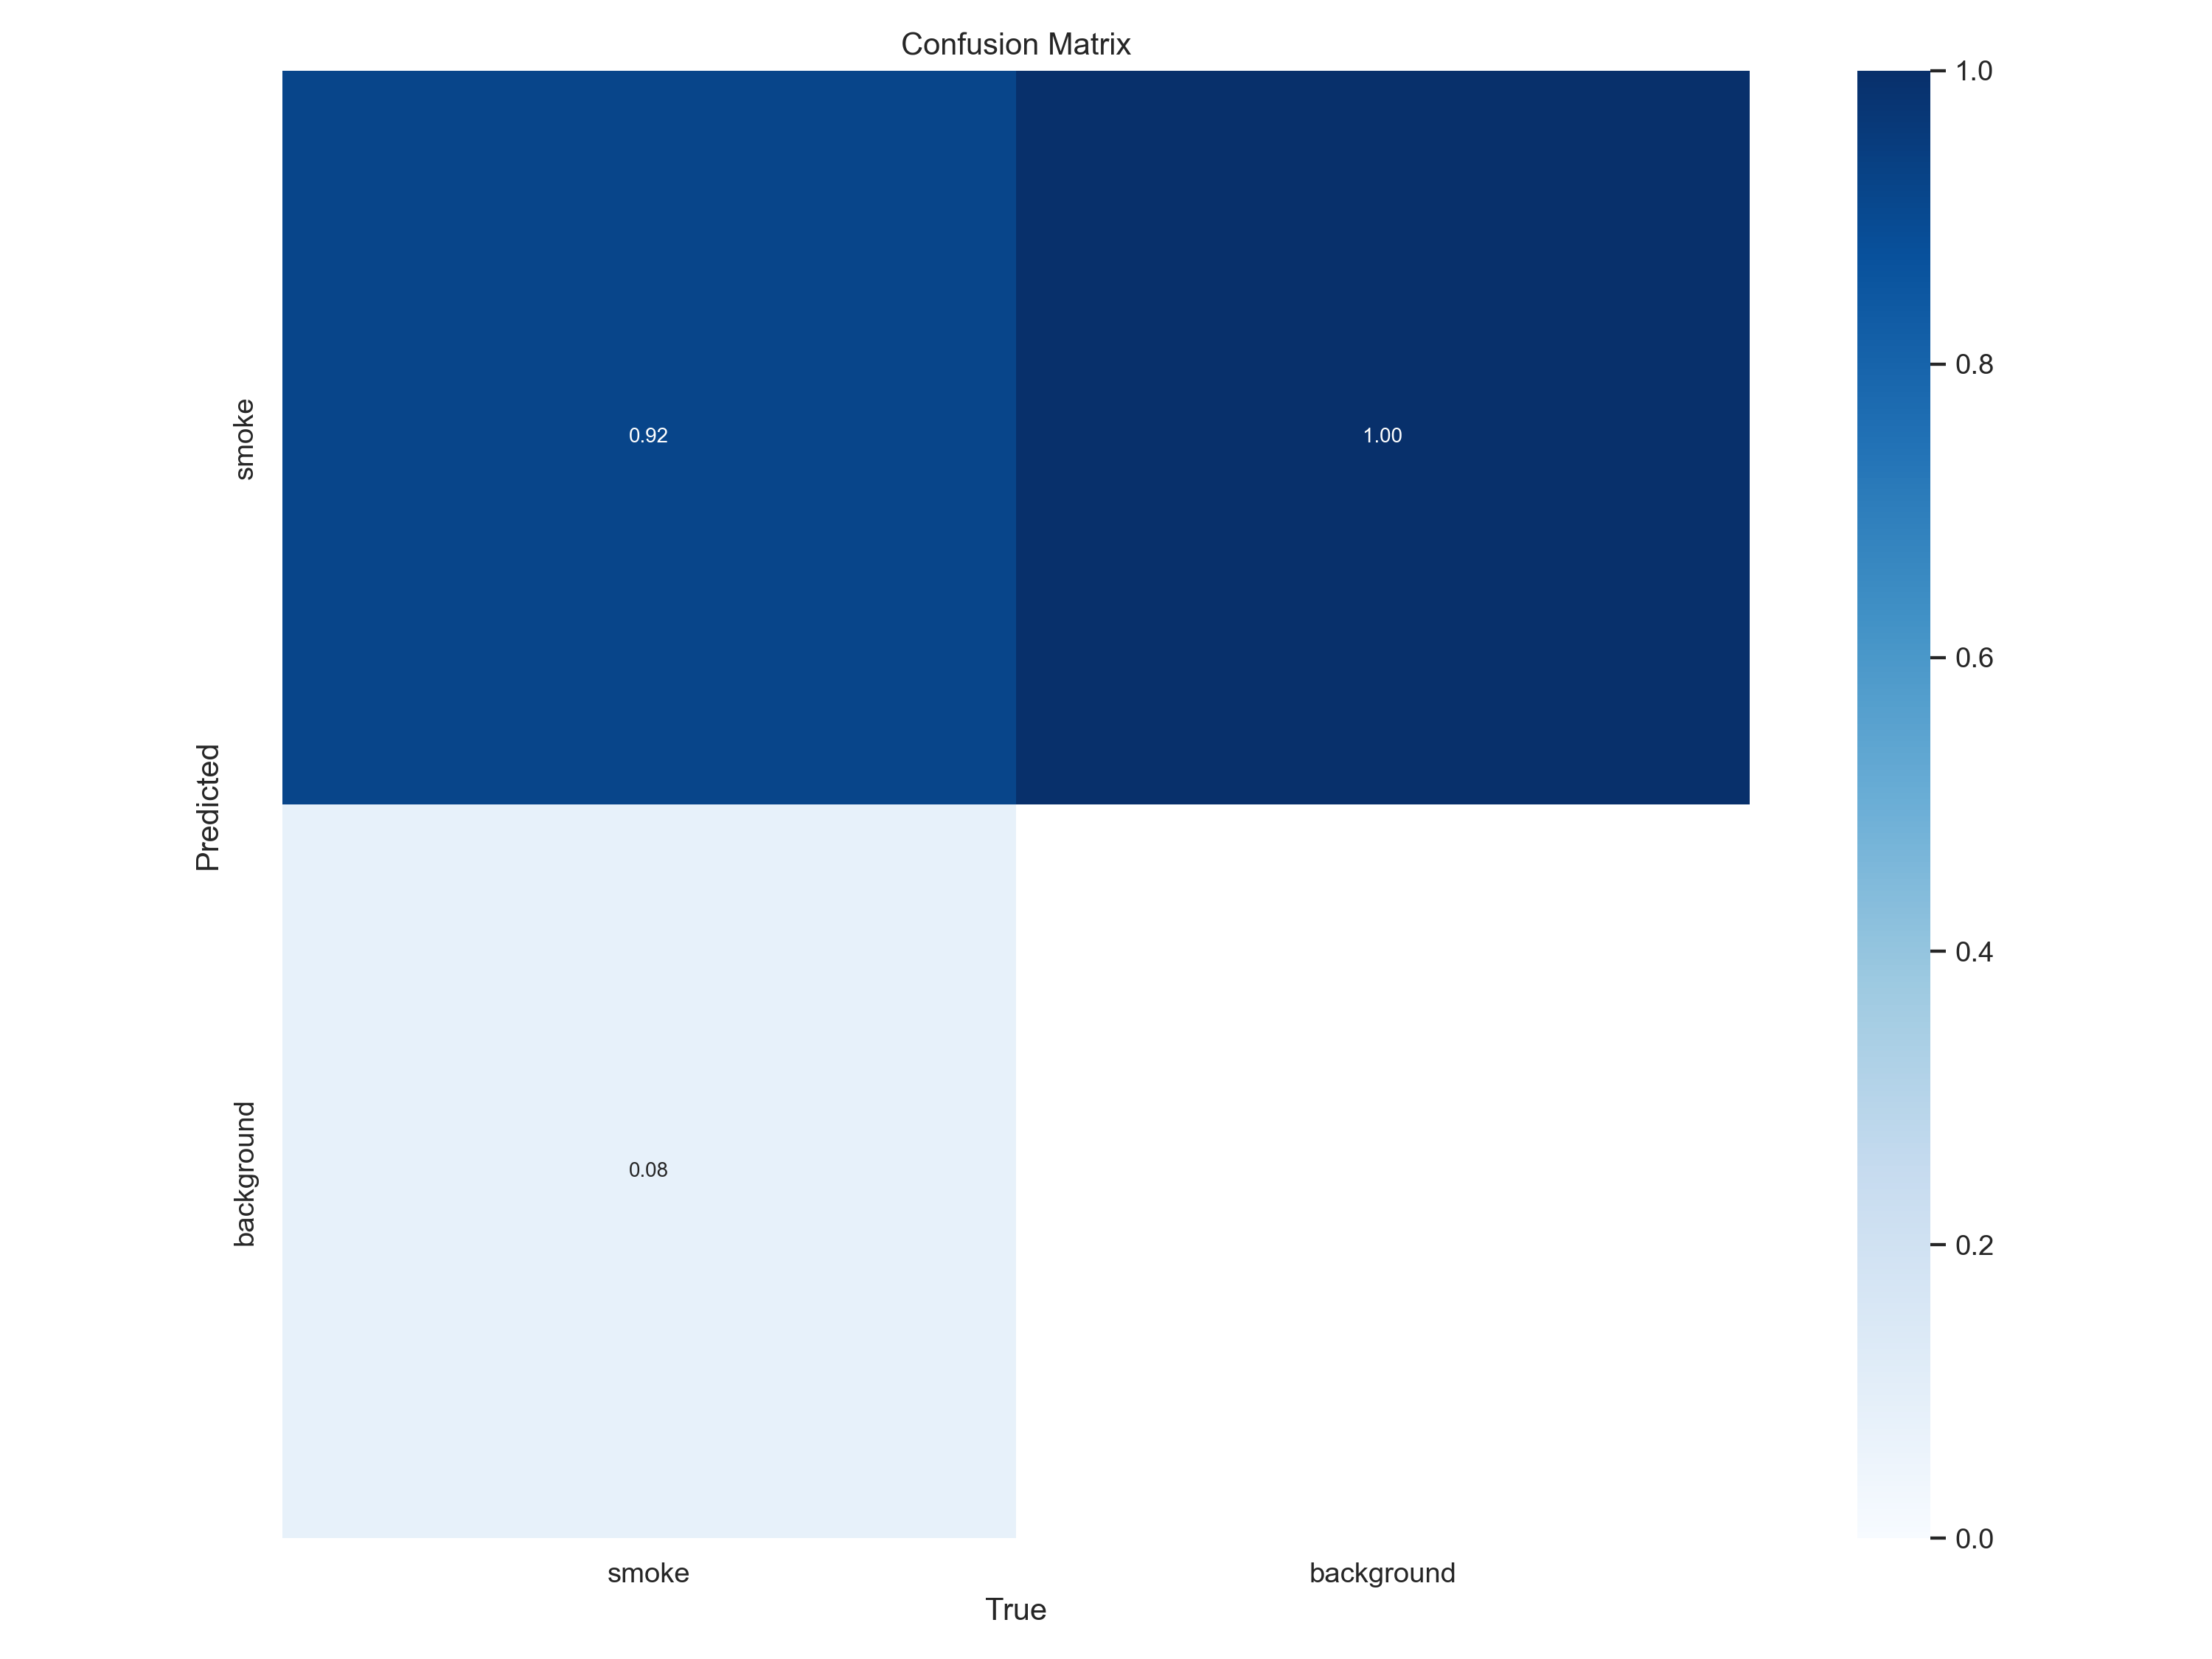

In [34]:
conf_mat='./runs/detect/train6/confusion_matrix.png'
Image(filename=conf_mat, width='80%')

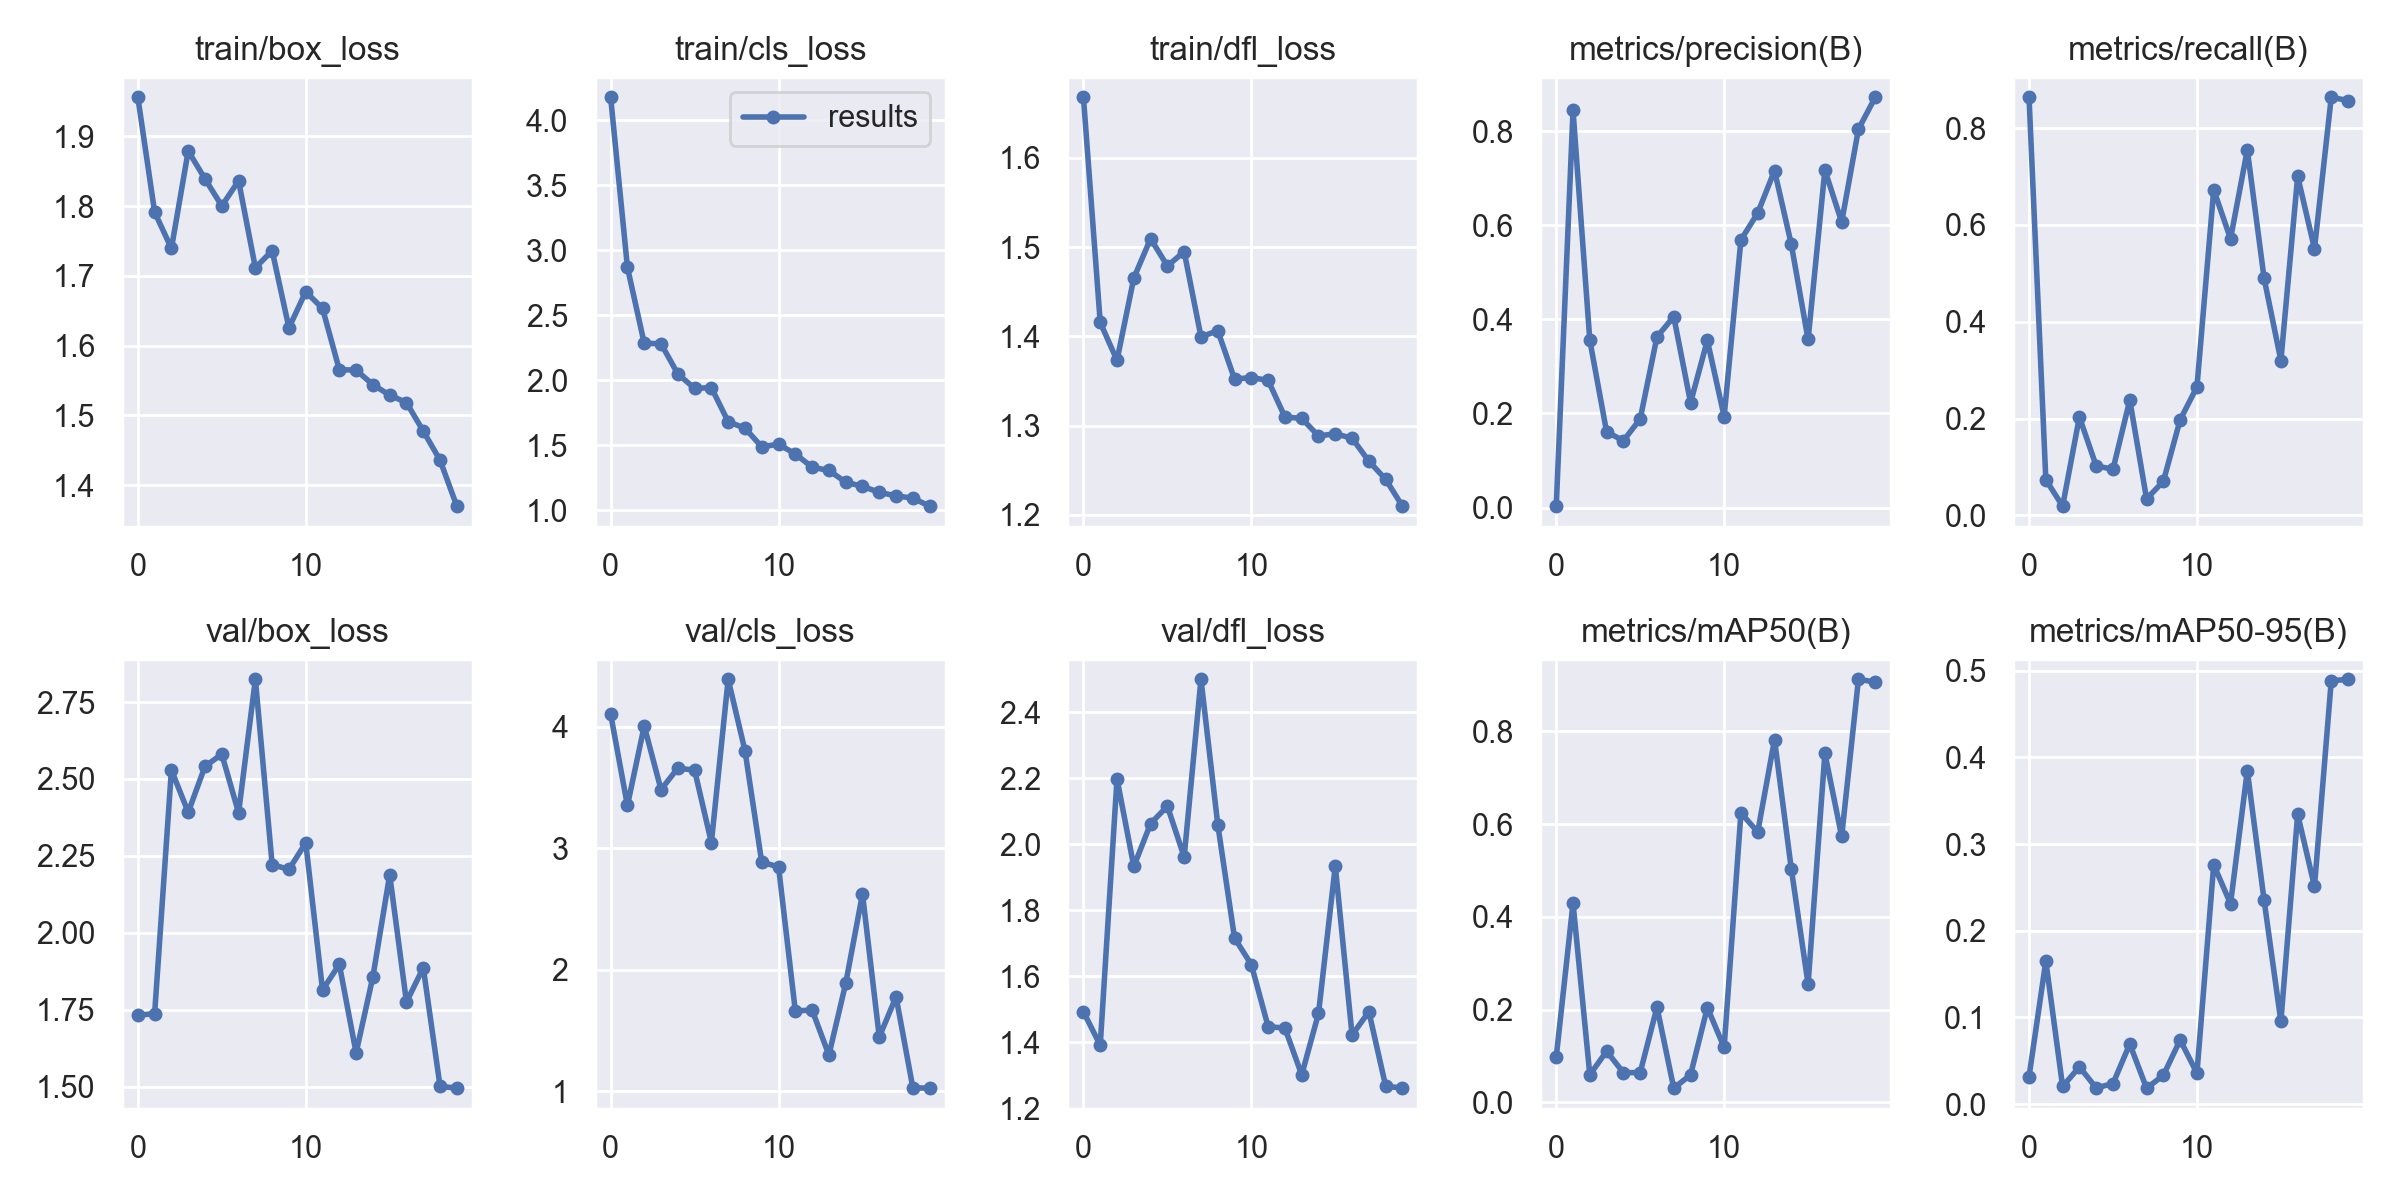

In [33]:
plots='./runs/detect/train6/results.png'
Image(filename=plots, width='80%')

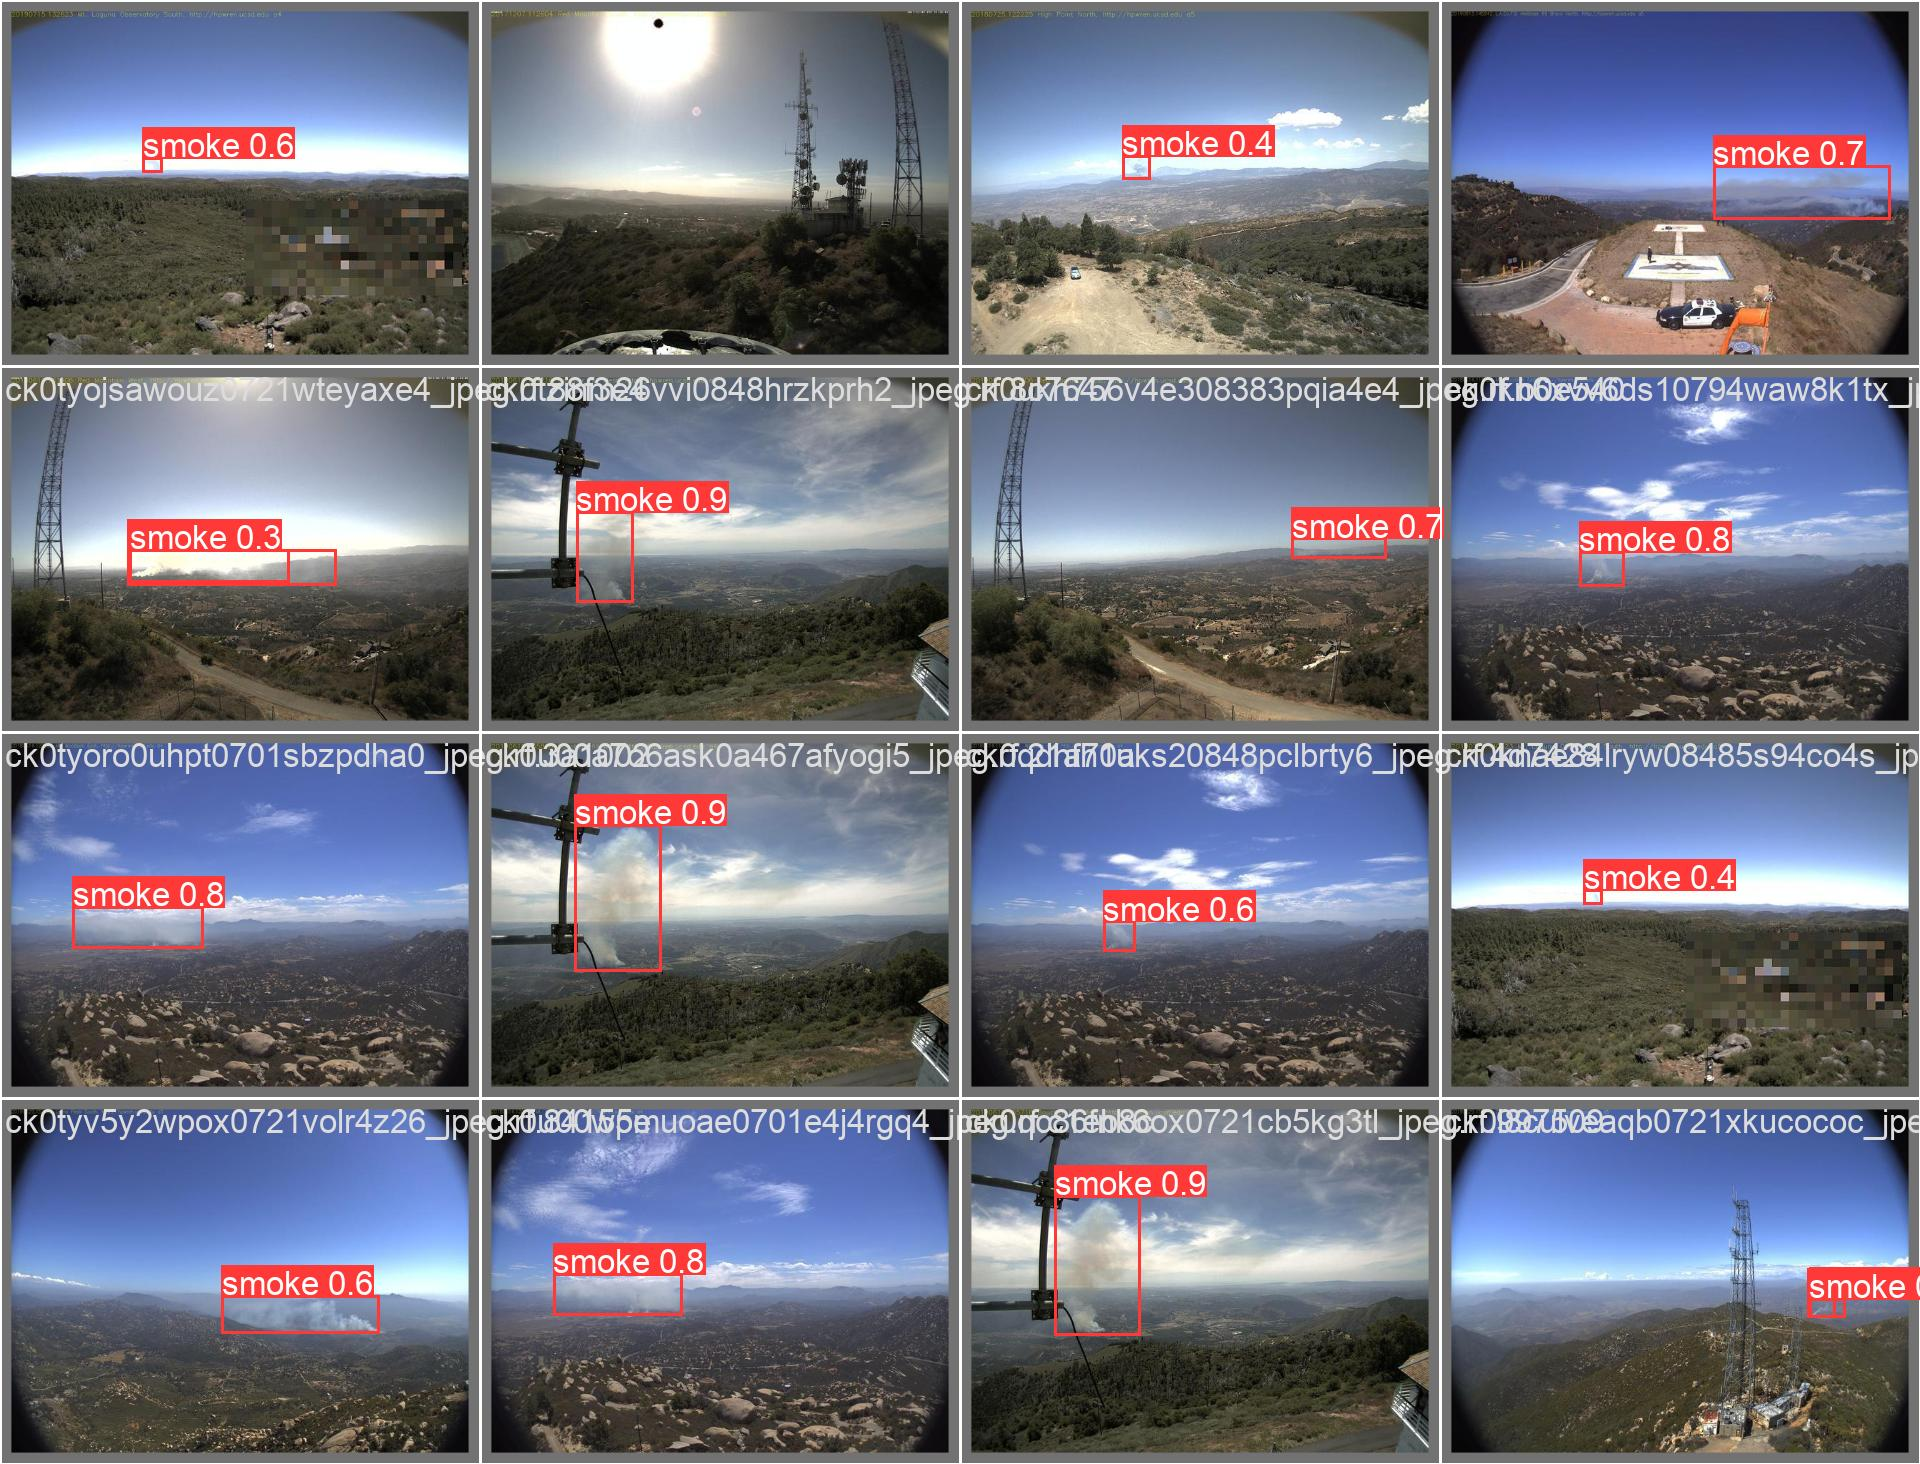

In [32]:
val_img_pred='./runs/detect/train6/val_batch2_pred.jpg'
Image(filename=val_img_pred, width='80%')

#### Yolo CLI model validation & mAP metrics

In [35]:
!yolo task=detect mode=val model=./runs/detect/train6/weights/best.pt data=./data.yaml

Ultralytics YOLOv8.0.52 🚀 Python-3.10.9 torch-1.13.1 CPU
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /Users/agustingenoud/Desktop/apps/Data-Science-Challenge-main/Data
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all        147        147      0.871      0.857      0.906      0.491
Speed: 0.6ms preprocess, 158.9ms inference, 0.0ms loss, 0.4ms postprocess per image
Results saved to runs/detect/val3


---

#### 2nd training with a bigger batch size & more epochs